<a href="https://colab.research.google.com/github/Nightmare125/Compiler-Construction/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**119262 Elvis Kiberi**

**122589 Maina Richard Gichomo**

**121542 Glenn Ngio**

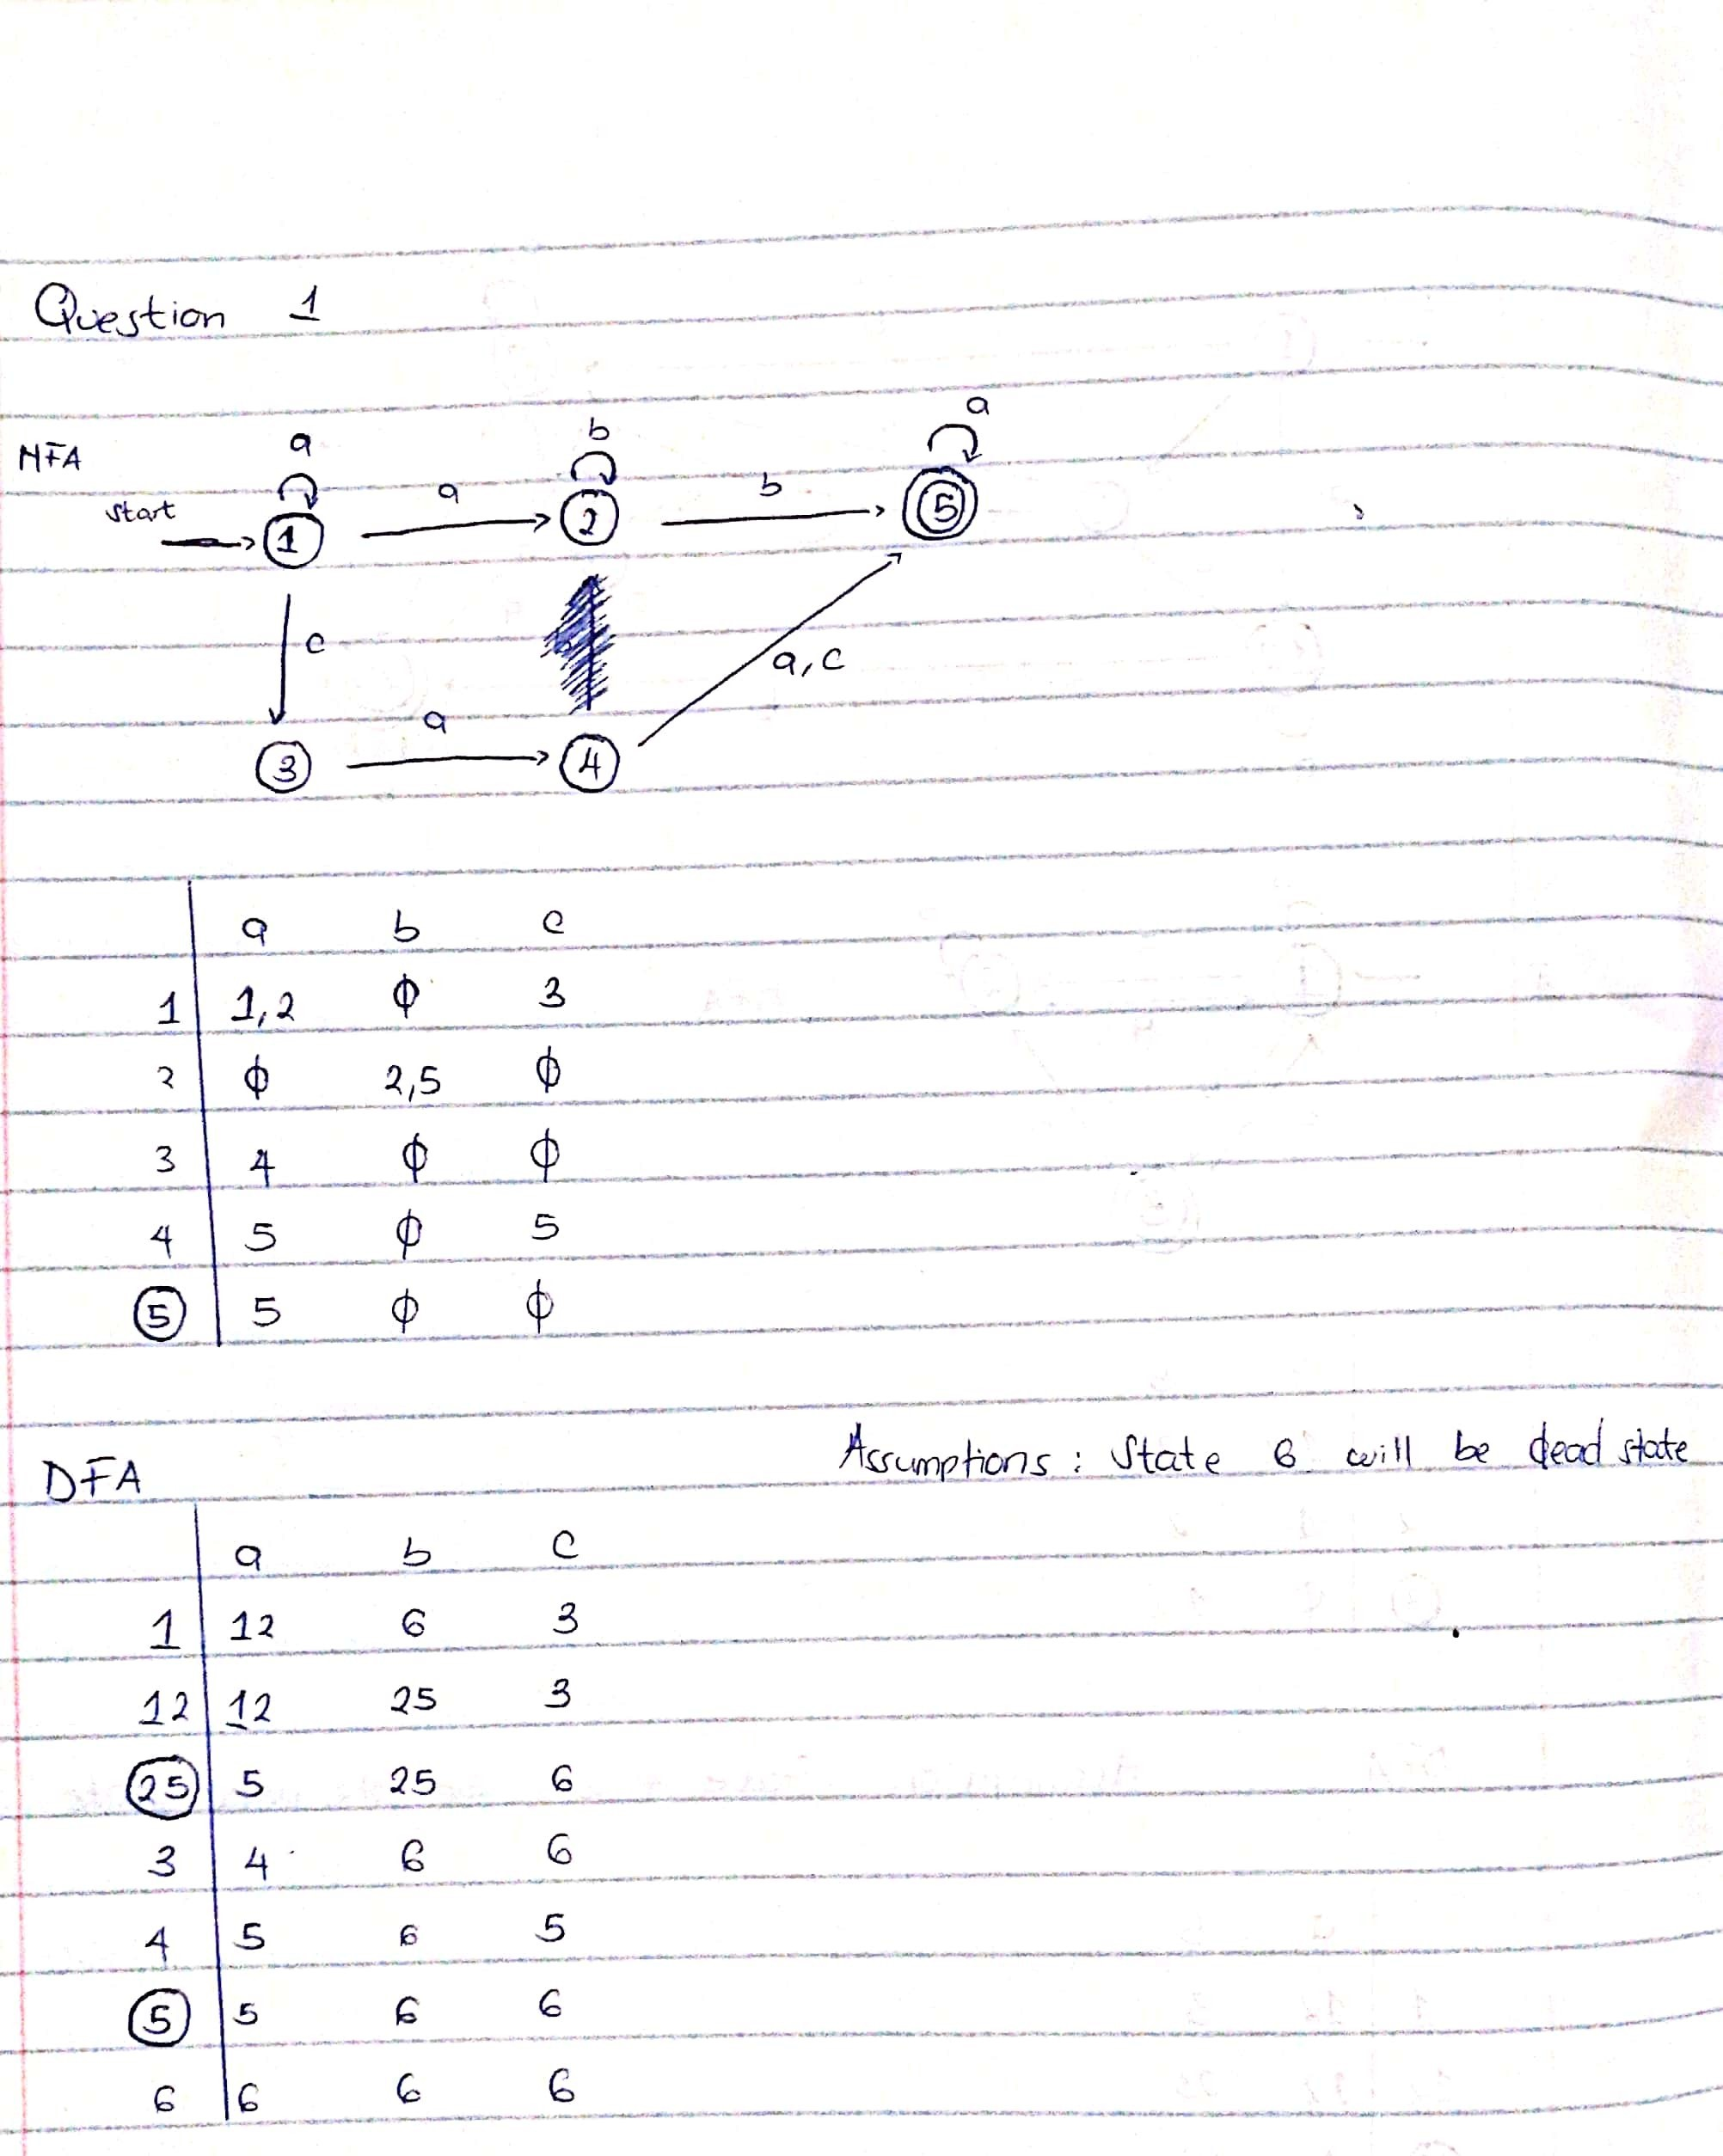

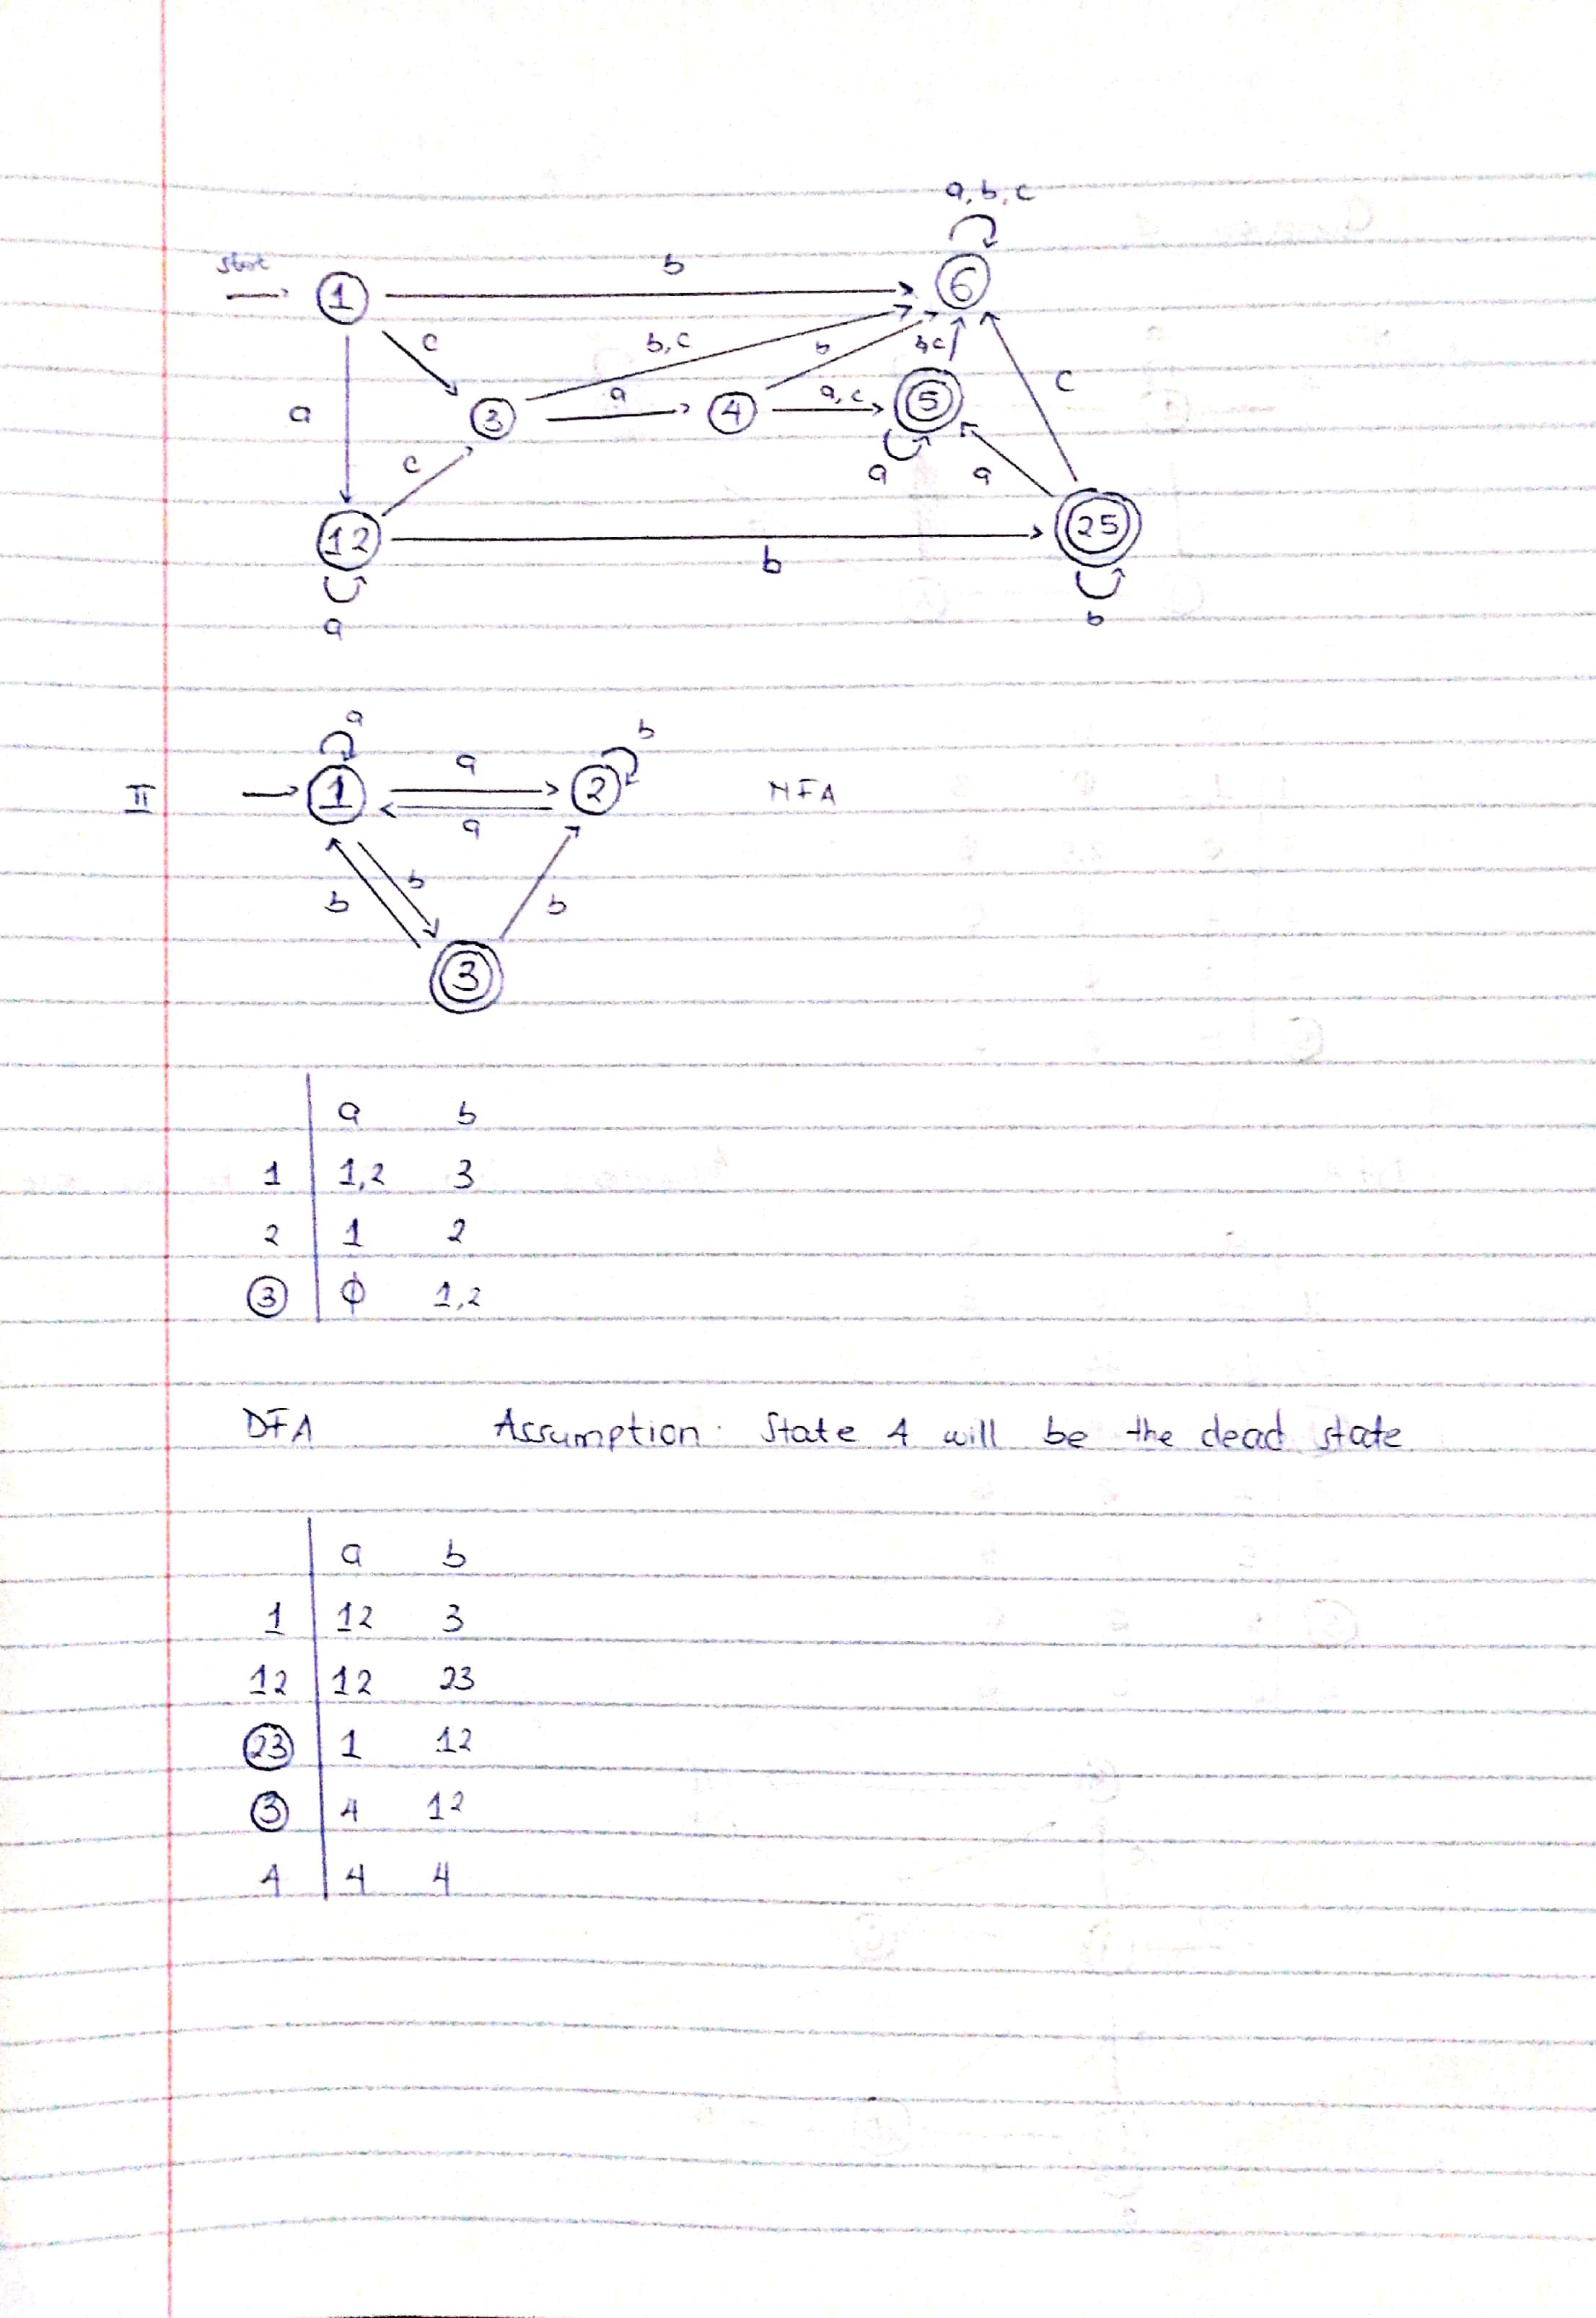

**FLEX**

The Flex program's fundamental framework is:

Statements/Definitions

%%

Rules

%%

User Functions (optional)

and we store the lexer in a file that ends with .l

*Definitions:*

We can start by giving the tool a few options, like:

%option noyywrap -> flex will read only one input file

%option case-insensitive -> flex doesn't distinguish between uppercase and lowercase letters

For some regular expressions, we can also start states by using:
%x STATE_NAME

For example, this will be handy for multiline comments because it makes it simpler to constantly search for something and finish this "State-Loop" when the comment section's end was reached.

Using regular expressions, we can define some identifiers and give them names, such as:

print     [ -~]      // space to ~ (all printable ASCII characters)

that specifies  "print" as a group including all printable characters.

Instead of writing the entire regex each time we want to look for a particular token, we can then call these using identifiers.

A literal block of code, which is genuine C code and contains header files, constants, global variables, function definitions, etc., is the final option. Finally, the compiler will incorporate this code after it has been copied to the syntax analyzer (parser) as well.

To define this block we use:

%{
  
    // literal c code
%}

In order to identify the location of an issue, we will additionally include the symbol table header file in this case along with a global line number variable for our error function. 

*Rules*

Here we define the rules for our Tokens.

We use the syntax:

regex-rule     { // c action-code }

The first one goes without saying. It will only have the regex rule in it.

The action is defined in the second section, which is literal C code. For the time being, we will just print to the console that a certain token has been located, and then we will give the parser (syntax analyst) the token-id so that he can assemble the tokens according to a syntax.

So, to search for a sequence of printable character we use:

{print}+     { printf("Found printable character sequence %s\n", yytext); }

The first rule looked for one or more printable characters, and if it was found, we printed the action's message. Every time, the variable yytext contains the recognized token.

*User Functions*
Last but not least, we can define functions.

If we don't use the parser for that, the code must, for instance, have a main() function. It may additionally have a function called yyerror() that outputs an error if a "strange" undefined character or token is discovered. 
The option "%option noyywrap" defines the yywrap() method. In order to return the token to the parser later on and print it to the console for testing, we might also want to have a method that prints out the token name and value (token-id and yytext), similar to ret print() or something similar.

*Variables* 

Finally, let's talk about the crucial Flex variables, one of which we have already seen.

char *yytext -> it contains the recognized token

int yyleng -> contains the length of the recognized token

YYSTYPE yylval -> used for communication with the parser 

*Running Flex*
You can run the lexer using:

flex lexer.l  // lexer.l is the lexer file

gcc lex.yy.c  -o lexer -lfl  // lex.yy.c is the result of "flex lexer.l"

./lexer input_file   // lexer is the executable and we will set up main() to take in an input file


**Example**

/*** Definition Section has one variable
which can be accessed inside yylex()
and main() ***/

%{

int count = 0;

%}


/*** Rule Section has three rules, first rule
matches with capital letters, second rule
matches with any character except newline and
third rule does not take input after the enter***/

%%

[A-Z] {printf("%s capital letter\n", yytext);

	count++;}

.	 {printf("%s not a capital letter\n", yytext);}

\n {return 0;}

%%


/*** Code Section prints the number of
capital letter present in the given input***/

int yywrap(){}

int main(){

// Explanation:
// yywrap() - wraps the above rule section
/* yyin - takes the file pointer
		which contains the input*/
/* yylex() - this is the main flex function
		which runs the Rule Section*/
// yytext is the text in the buffer

// Uncomment the lines below
// to take input from file
// FILE *fp;
// char filename[50];
// printf("Enter the filename: \n");
// scanf("%s",filename);
// fp = fopen(filename,"r");
// yyin = fp;

yylex();

printf("\nNumber of Capital letters "

	"in the given input - %d\n", count);

return 0;

}

Output

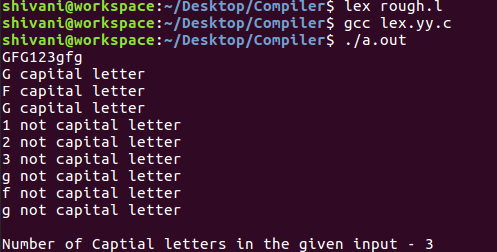


**Bison**

*Steps to use Bison*

* To handle input and deliver tokens to the parser, create a lexical analyzer
* Describe the grammar rules, yyparse(), and yyerror() in the grammar specification for bison .
* To create the parser, run Bison on the grammar.
* Compile any additional source files as well as the code produced by Bison.
* To create the end result, link the object files together.

*Format* 

 %{
    C Declarations
    
    %}
    Bison Declarations
    %%
    Grammar Rules
    %%
    Additional C Code 

*Useful Bison definitions*
   
   %token, %union, %type, %left, %right, %nonassoc, etc;

Format of the grammar rules section:

    result: components ...
        ;

Important data structure and functions:

    yylval, YYSTYPE, yyerror(), yyparse() 


**Example in code**

By default dison will crete the output file with the same name ans the intut file with .tab appended to the name.

linux @ ubuntu Les $ ls

file.lex file.y

linux @ ubuntu : ~ / files $ bison

linux @ ubuntu : ~ / files $ ls

file.lex file.tab.c file . y

linux @ ubuntu :~/ files$


-p :It is used to add own cuatom prefix to the external symbols.

bison -p FILE file.y




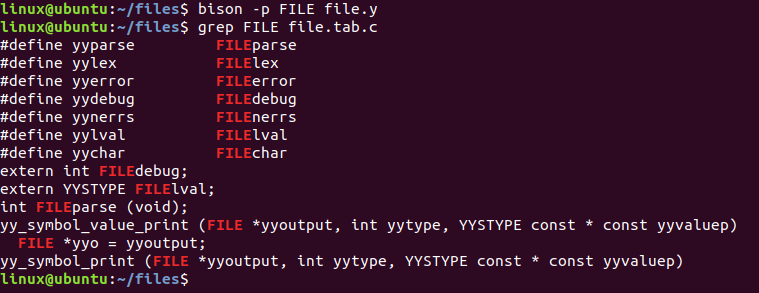